In [ ]:
# Import necessary libraries for data handling, visualization, modeling, and evaluation

import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For advanced visualization

from sklearn.model_selection import train_test_split  # To split the dataset into training and testing sets
from sklearn.tree import DecisionTreeClassifier, plot_tree  # Decision Tree model and visualization
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score  # Model evaluation metrics
from sklearn.preprocessing import StandardScaler  # For feature scaling


In [ ]:
# Load the dataset into a pandas DataFrame
data = pd.read_csv("diabetes.csv")

# Define column names representing input features and the target variable
columns = [
    'Pregnancies',                  # Number of pregnancies
    'Glucose',                      # Plasma glucose concentration
    'BloodPressure',                # Diastolic blood pressure (mm Hg)
    'SkinThickness',                # Triceps skinfold thickness (mm)
    'Insulin',                      # 2-Hour serum insulin (mu U/ml)
    'BMI',                          # Body Mass Index (kg/m^2)
    'DiabetesPedigreeFunction',     # Diabetes pedigree function (family history)
    'Age',                          # Age (years)
    'Outcome'                       # Target variable (0: No diabetes, 1: Diabetes)
]


In [ ]:
# Split the dataset into features (X) and target labels (y)
X = data.drop('Outcome', axis=1)  # Features: all columns except 'Outcome'
y = data['Outcome']               # Target: the 'Outcome' column


In [ ]:
# Split the dataset into features (X) and target labels (y)
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Standardize the feature data for better model performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets (70% train, 30% test) with stratified sampling
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

# Create and train a Decision Tree classifier with a maximum depth of 6
tree_model = DecisionTreeClassifier(max_depth=6, random_state=42)
tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = tree_model.predict(X_test)

# Print model evaluation metrics
print('Classification Report:\n', classification_report(y_test, y_pred))
print('Model Accuracy:', accuracy_score(y_test, y_pred))


Classification report:
               precision    recall  f1-score   support

           0       0.79      0.94      0.86       150
           1       0.83      0.54      0.66        81

    accuracy                           0.80       231
   macro avg       0.81      0.74      0.76       231
weighted avg       0.81      0.80      0.79       231

Přesnost modelu: 0.8008658008658008


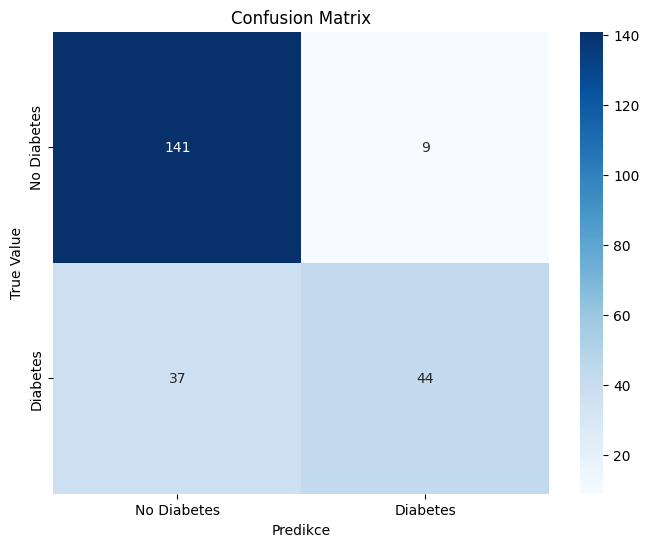

In [ ]:
# Construct the confusion matrix to evaluate classification performance
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix')
sns.heatmap(
    conf_matrix,
    annot=True,
    cmap='Blues',
    fmt='d',
    xticklabels=['No Diabetes', 'Diabetes'],
    yticklabels=['No Diabetes', 'Diabetes']
)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


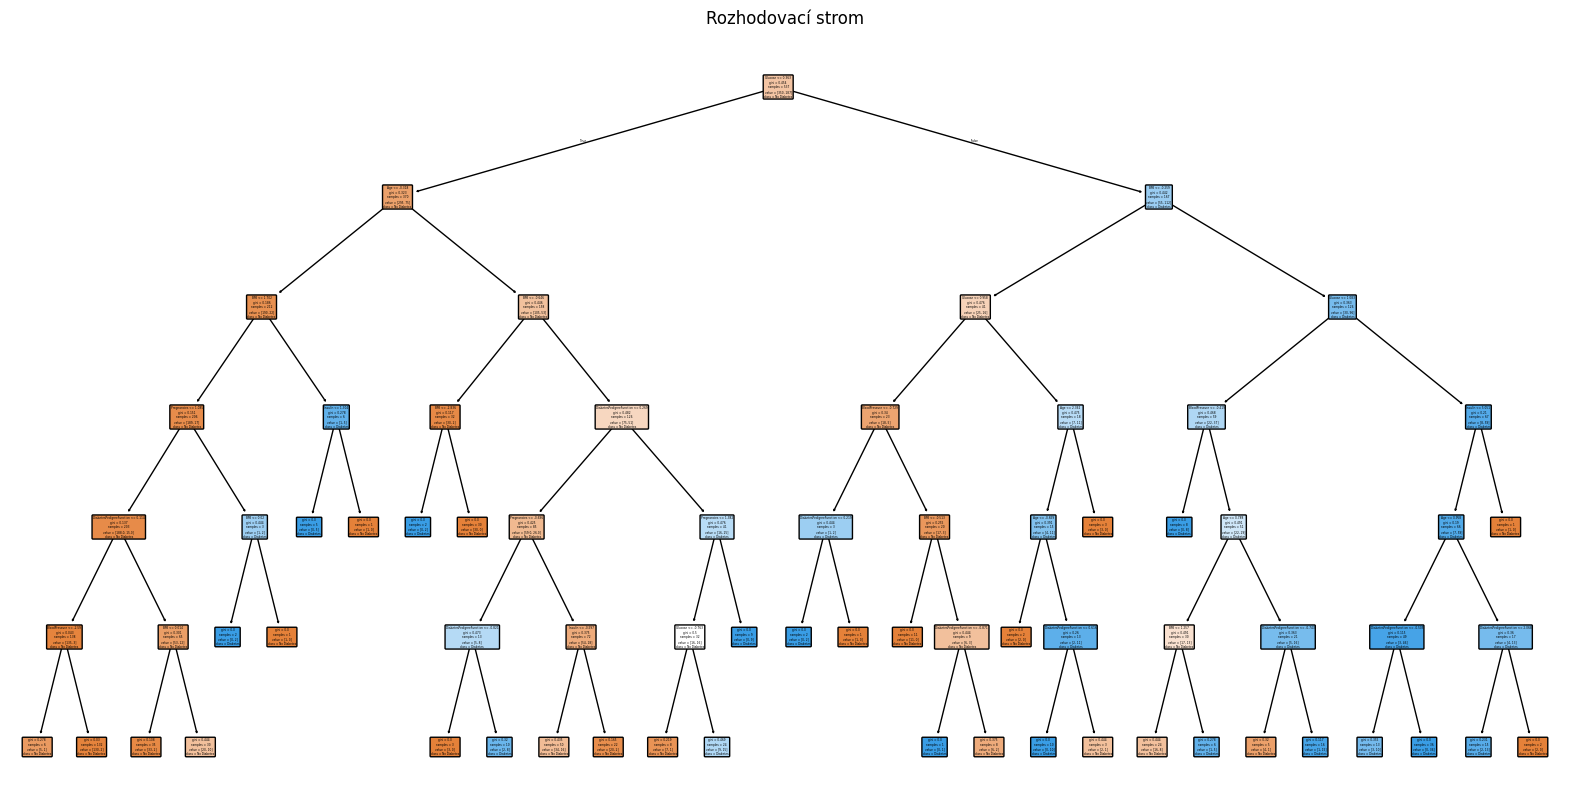

In [ ]:
# Visualize the trained decision tree
plt.figure(figsize=(20, 10))
plot_tree(
    tree_model,
    feature_names=columns[:-1],         # Feature names excluding the target
    class_names=['No Diabetes', 'Diabetes'],  # Class labels
    filled=True,                        # Fill nodes with color based on class
    rounded=True                        # Rounded corners for better readability
)
plt.title('Decision Tree')
plt.show()
